In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
np.random.seed(42)

mu_true = np.array([25,60])
sigma = np.array([[4,8],[8,25]])

N = 100

x = np.random.multivariate_normal(mu_true,sigma, size = N)

In [14]:
# Prior
mu_0 = np.array([20,50])
lambda_0 = np.diag([100,100])

# Posterior Parameters
x_bar = x.mean(axis = 0)
print("Sample mean x̄:", x.mean(axis=0))

sigma_inv = np.linalg.inv(sigma)
lambda_0_inv = np.linalg.inv(lambda_0)

lambda_n_inv = N * sigma_inv + lambda_0_inv

lambda_n = np.linalg.inv(lambda_n_inv)
mu_n = lambda_n @ (N * sigma_inv @ x_bar + lambda_0_inv @ mu_0 )



Sample mean x̄: [25.15777412 60.58868745]


In [15]:
# Sampling from the Posterior

posterior_samples = np.random.multivariate_normal(mu_n, lambda_n, size = 10000)
print("Posterior mean μ_N:", mu_n)
print("Posterior cov:", lambda_n)

Posterior mean μ_N: [25.14726867 60.55817419]
Posterior cov: [[0.03992022 0.07976864]
 [0.07976864 0.2493129 ]]


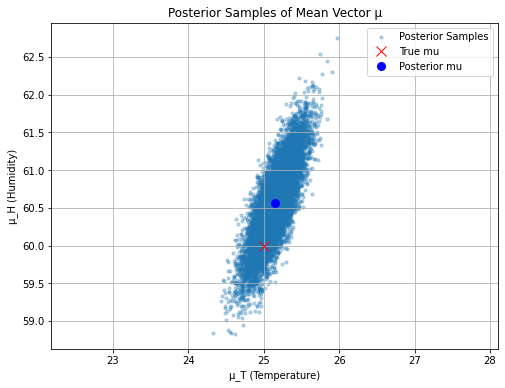

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(posterior_samples[:,0], posterior_samples[:,1], alpha = 0.3, s = 10, label = "Posterior Samples")
plt.plot(mu_true[0], mu_true[1], "rx", label = "True mu", markersize = 10)
plt.plot(mu_n[0], mu_n[1], "bo", label = "Posterior mu", markersize = 8)
plt.xlabel("μ_T (Temperature)")
plt.ylabel("μ_H (Humidity)")
plt.title("Posterior Samples of Mean Vector μ")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()